In [1]:
#Standard Libraries
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
import statistics as stat
import numpy as np
import seaborn as sns
import random 

#Dataset Trimming and Transformation
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

#Regressors
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.neural_network import MLPRegressor

#Evaluation
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dataframe and Feature Groups

In [2]:
df = pd.read_csv('2023Jan.csv')
df = df.dropna()

In [2]:
groups = {'MOF & Target': ['MOF', 'Uptake', 'Pressure'],
 'A': ['H', 'C', 'N', 'F', 'Cl', 'Br', 'V', 'Cu', 'Zn', 'Zr'],
 'B': ['ASA_m^2/g_15prb',
  'NASA_m^2/g_15prb',
  'AV_cm^3/g_15prb',
  'NAV_cm^3/g_15prb',
  'POAV_cm^3/g_15prb',
  'PONAV_cm^3/g_15prb',
  'PLD',
  'LCD',
  'LFPD',
  'Density',
  'Volume'],
 'C': ['TotalDegreeOfUnsaturation',
  'MetallicPercentage',
  'OxygenToMetalRatio',
  'ElectronegativeToTotalRatio',
  'WeightedElectronegativityPerAtom',
  'NitrogenToOxygen'],
 'D': ['Epoch40',
  'Epoch1000',
  'Epoch4000',
  'Epoch40Ave',
  'Epoch4000Ave',
  'Epoch1000Ave'],
 'E': ['S3_Average',
  'S3_EigenValue1',
  'S3_EigenValue2',
  'S3_EigenState1',
  'S3_EigenState2',
  'S3_EigenState3',
  'S3_EigenState4',
  'S3_Product',
  'S3_MaxProb',
  'S3_MinProb'],
    'F': ['HenryCoeff_CO2']}

In [3]:
baseline_descriptors = groups['A'] +  groups['B'] + groups['C']
desriptors_all = groups['A'] +  groups['B'] + groups['C']+ groups['D']+ groups['E']+ groups['F']
all_cols = groups['MOF & Target'] + desriptors_all
energy_descriptors = groups['F']
non_energetic_descriptors = groups['A'] +  groups['B'] + groups['C']+ groups['D']+ groups['E']

# Machine Learning Model Initialisation

In [6]:
SEED = 2559288933 #obtained from random.randint(0,2**32 - 1)
print(SEED)

2559288933


In [7]:
Models = {
    'AdaBoostRegressor': AdaBoostRegressor(),
    'BaggingRegressor': BaggingRegressor(),
    'ExtraTreesRegressor': ExtraTreesRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'HistGradientBoostingRegressor': HistGradientBoostingRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'BayesianRidge': BayesianRidge()
}

In [8]:
print("40 Pa \n--------------------\n")
current  = df[df.Pressure == 40] 
for algo in Models:
    X = current[desriptors_all]
    y = current['Uptake']
    ml = Models[algo]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
    ml.fit(X_train,y_train)        
    train_pred = ml.predict(X_train)
    train_r2   = r2_score(y_train,train_pred)
    test_pred  = ml.predict(X_test)
    test_r2    = r2_score(y_test,test_pred)

    print(f'{algo:30} Train R2: {train_r2:5.4}   Test R2: {test_r2:5.4}')

40 Pa 
--------------------

AdaBoostRegressor              Train R2: 0.9343   Test R2: 0.8754
BaggingRegressor               Train R2: 0.9887   Test R2: 0.9104
ExtraTreesRegressor            Train R2:   1.0   Test R2: 0.8879
GradientBoostingRegressor      Train R2: 0.981   Test R2: 0.9248
HistGradientBoostingRegressor  Train R2: 0.9937   Test R2: 0.9302
RandomForestRegressor          Train R2: 0.9908   Test R2: 0.9243
LinearRegression               Train R2: 0.298   Test R2: 0.297
BayesianRidge                  Train R2: 0.2895   Test R2: 0.2806


In [9]:
print("1000 Pa \n--------------------\n")
current  = df[df.Pressure == 1000] 
for algo in Models:
    X = current[desriptors_all]
    y = current['Uptake']
    ml = Models[algo]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=SEED)
    ml.fit(X_train,y_train)        
    train_pred = ml.predict(X_train)
    train_r2   = r2_score(y_train,train_pred)
    test_pred  = ml.predict(X_test)
    test_r2    = r2_score(y_test,test_pred)

    print(f'{algo:30} Train R2: {train_r2:5.4}   Test R2: {test_r2:5.4}')

1000 Pa 
--------------------

AdaBoostRegressor              Train R2: 0.8926   Test R2: 0.8731
BaggingRegressor               Train R2: 0.9859   Test R2: 0.9256
ExtraTreesRegressor            Train R2:   1.0   Test R2: 0.8786
GradientBoostingRegressor      Train R2: 0.9639   Test R2: 0.9229
HistGradientBoostingRegressor  Train R2: 0.9937   Test R2: 0.9476
RandomForestRegressor          Train R2: 0.991   Test R2: 0.9364
LinearRegression               Train R2: 0.423   Test R2:  0.43
BayesianRidge                  Train R2: 0.4157   Test R2: 0.4247


In [10]:
print("4000 Pa \n--------------------\n")
current  = df[df.Pressure == 4000] 
for algo in Models:
    X = current[desriptors_all]
    y = current['Uptake']
    ml = Models[algo]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=SEED)
    ml.fit(X_train,y_train)        
    train_pred = ml.predict(X_train)
    train_r2   = r2_score(y_train,train_pred)
    test_pred  = ml.predict(X_test)
    test_r2    = r2_score(y_test,test_pred)

    print(f'{algo:30} Train R2: {train_r2:5.4}   Test R2: {test_r2:5.4}')

4000 Pa 
--------------------

AdaBoostRegressor              Train R2: 0.8092   Test R2: 0.7512
BaggingRegressor               Train R2: 0.9851   Test R2: 0.918
ExtraTreesRegressor            Train R2:   1.0   Test R2: 0.8547
GradientBoostingRegressor      Train R2: 0.9459   Test R2: 0.9124
HistGradientBoostingRegressor  Train R2: 0.991   Test R2: 0.9425
RandomForestRegressor          Train R2: 0.9896   Test R2: 0.933
LinearRegression               Train R2: 0.4397   Test R2: 0.4178
BayesianRidge                  Train R2: 0.4327   Test R2: 0.4201


In [11]:
def evaluate_ML(ml,X,y,axes,title=""): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = SEED) 
    ml.fit(X_train,y_train)        
    train_pred = ml.predict(X_train)
    train_r2   = r2_score(y_train,train_pred)
    test_pred  = ml.predict(X_test)
    test_r2    = r2_score(y_test,test_pred)

    axes.plot(y_train,train_pred,'o',label = f'Train $R^2$={train_r2:4.3}')
    axes.plot(y_test,test_pred,'o',label = f'Test $R^2$={test_r2:4.3}')
    axes.legend()

    limit = max([max(y_train),max(train_pred),max(y_test),max(test_pred)])
    axes.set_xlim((0,limit))
    axes.set_ylim((0,limit))
    axes.plot((0,limit),(0,limit),'--k')
    axes.set_title(title,loc='left')

In [12]:
def X_y_from_pressure(df,pressure,descriptors=desriptors_all,target='Uptake'):
    current = df[df.Pressure == pressure] 
    X = current[descriptors]
    y = current[target]
    return X, y

## Using All Descriptors

In [13]:
ml = Models['RandomForestRegressor']

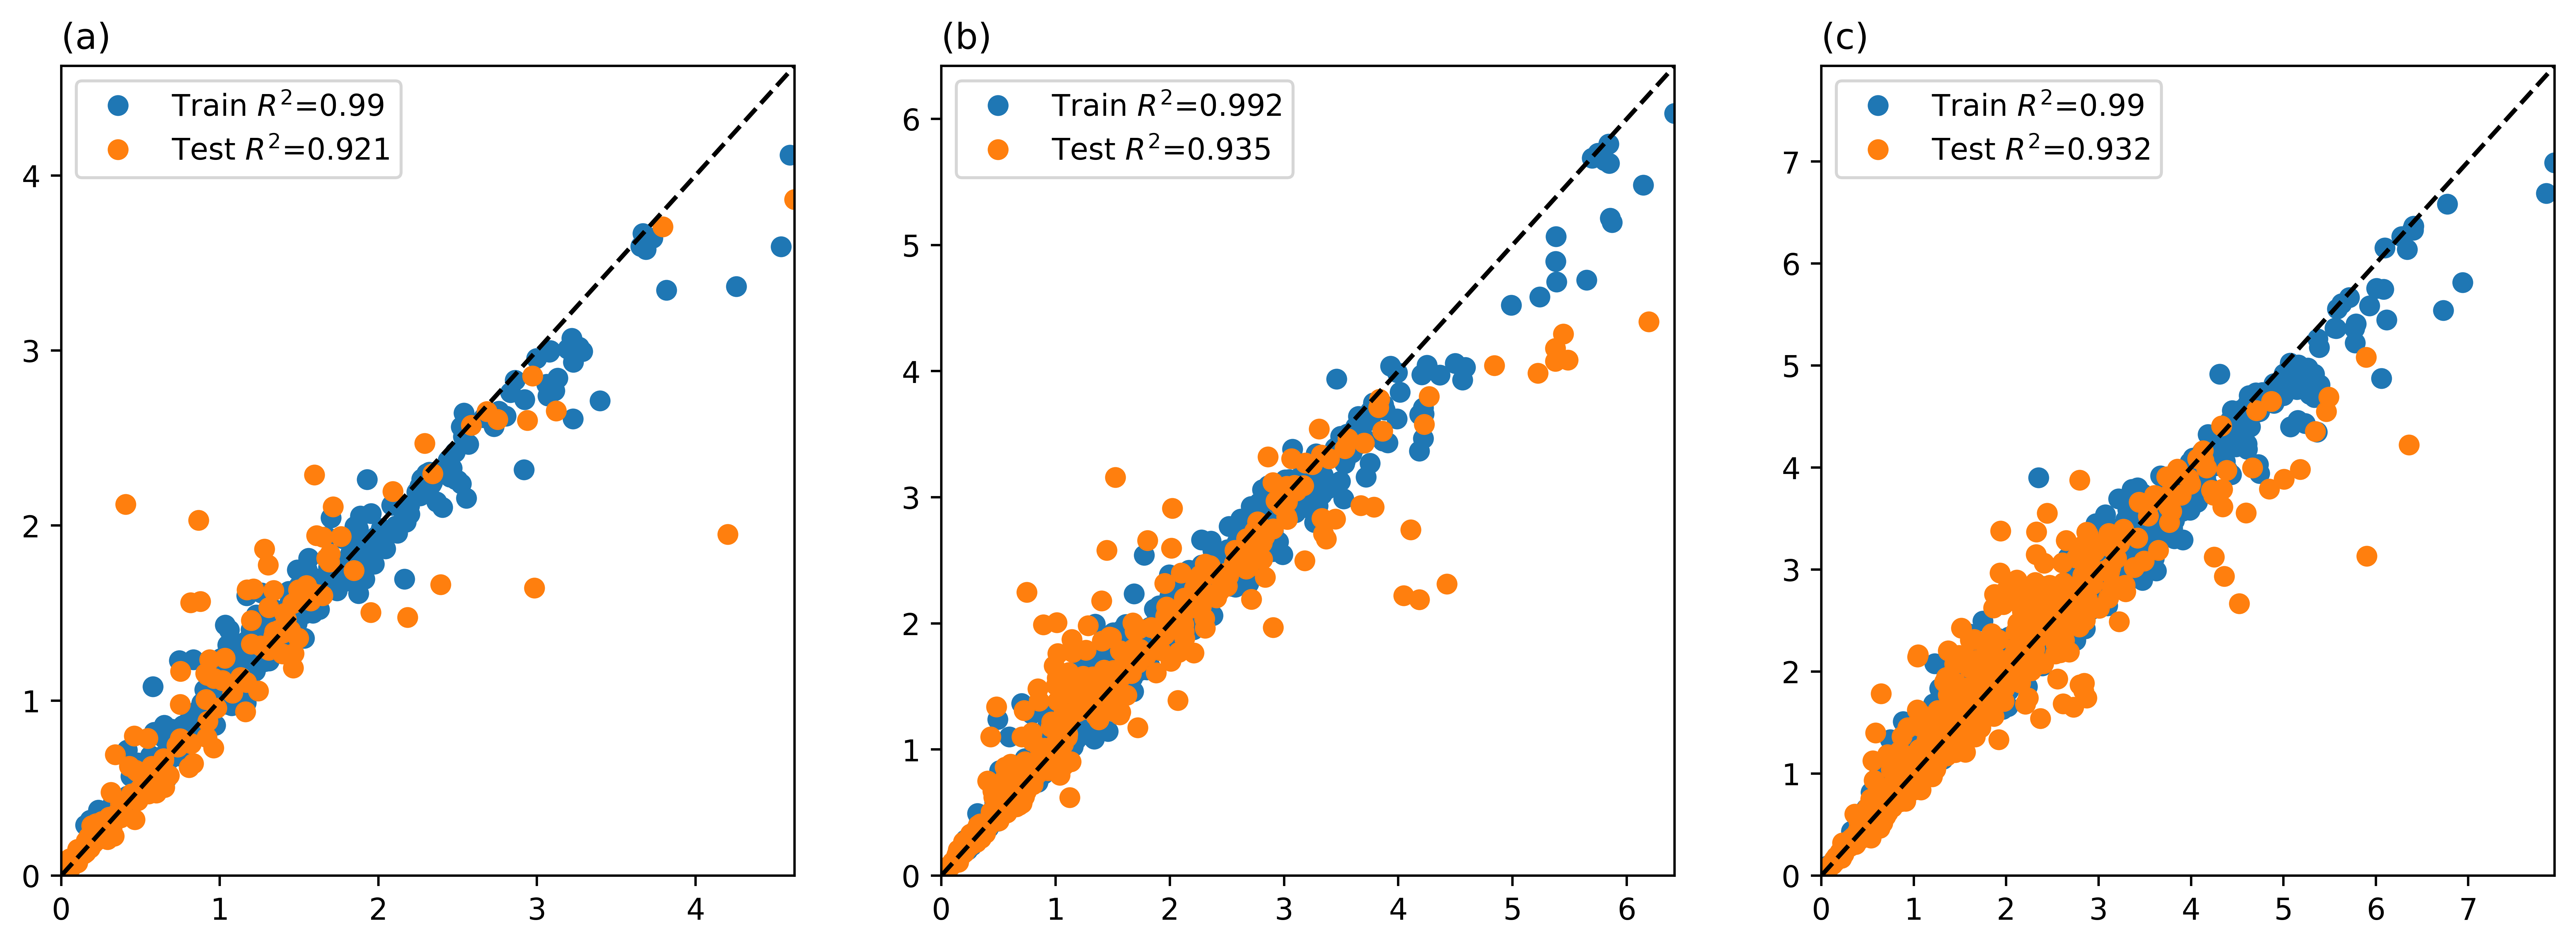

In [14]:
fig, ax = plt.subplots(1,3,dpi=700,figsize = (15,5))

X,y = X_y_from_pressure(df,40)
evaluate_ML(ml,X,y,ax[0],"(a)")

X,y = X_y_from_pressure(df,1000)
evaluate_ML(ml,X,y,ax[1],"(b)")

X,y = X_y_from_pressure(df,4000)
evaluate_ML(ml,X,y,ax[2],"(c)")

## Removing Henry Coeff and Heat of Adsorption from Descriptors

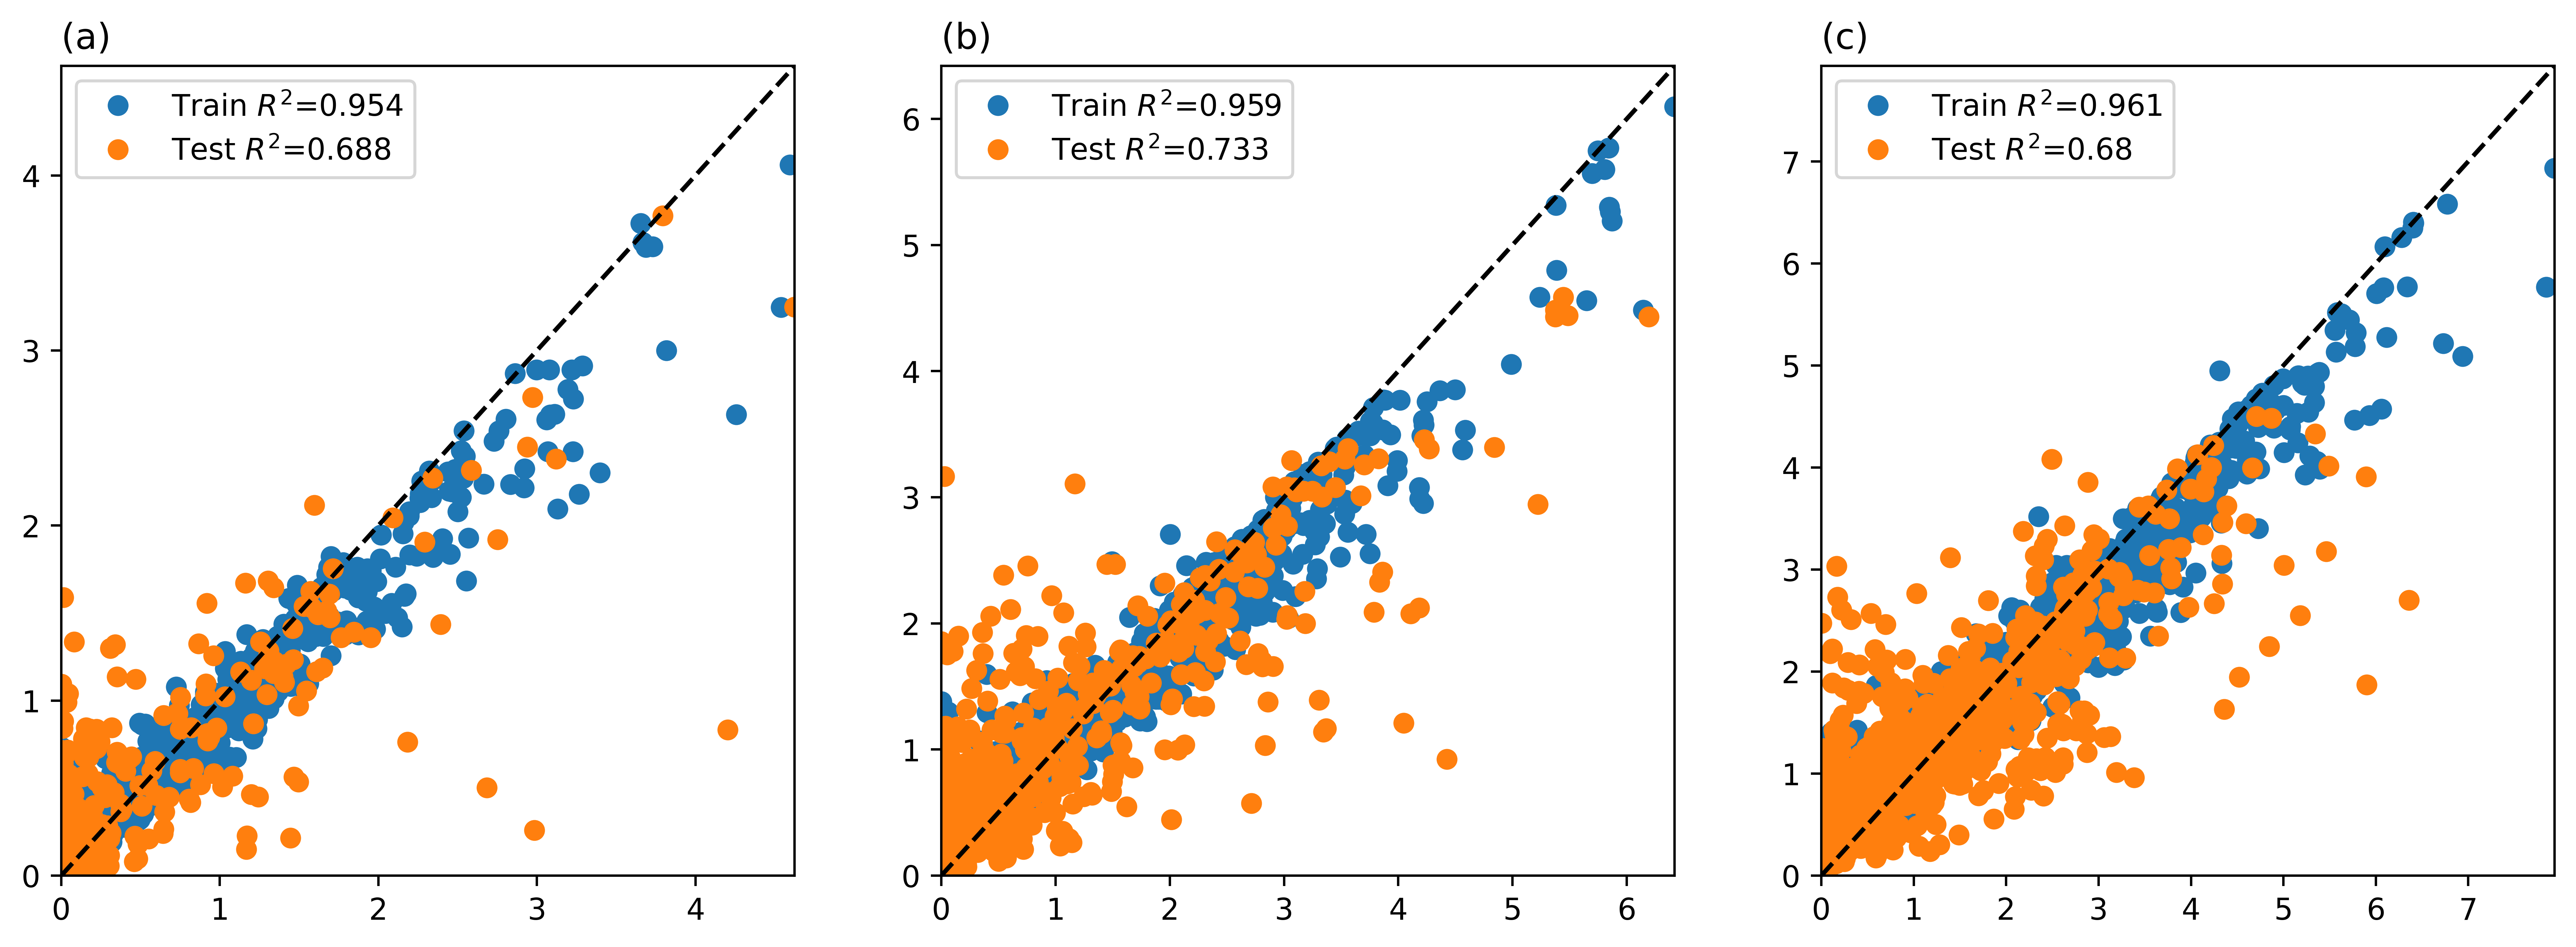

In [15]:
fig, ax = plt.subplots(1,3,dpi=700,figsize = (15,5))

X,y = X_y_from_pressure(df,40,non_energetic_descriptors)
evaluate_ML(ml,X,y,ax[0],"(a)")

X,y = X_y_from_pressure(df,1000,non_energetic_descriptors)
evaluate_ML(ml,X,y,ax[1],"(b)")

X,y = X_y_from_pressure(df,4000,non_energetic_descriptors)
evaluate_ML(ml,X,y,ax[2],"(c)")

# Feature Importances (without Energy Descriptors)

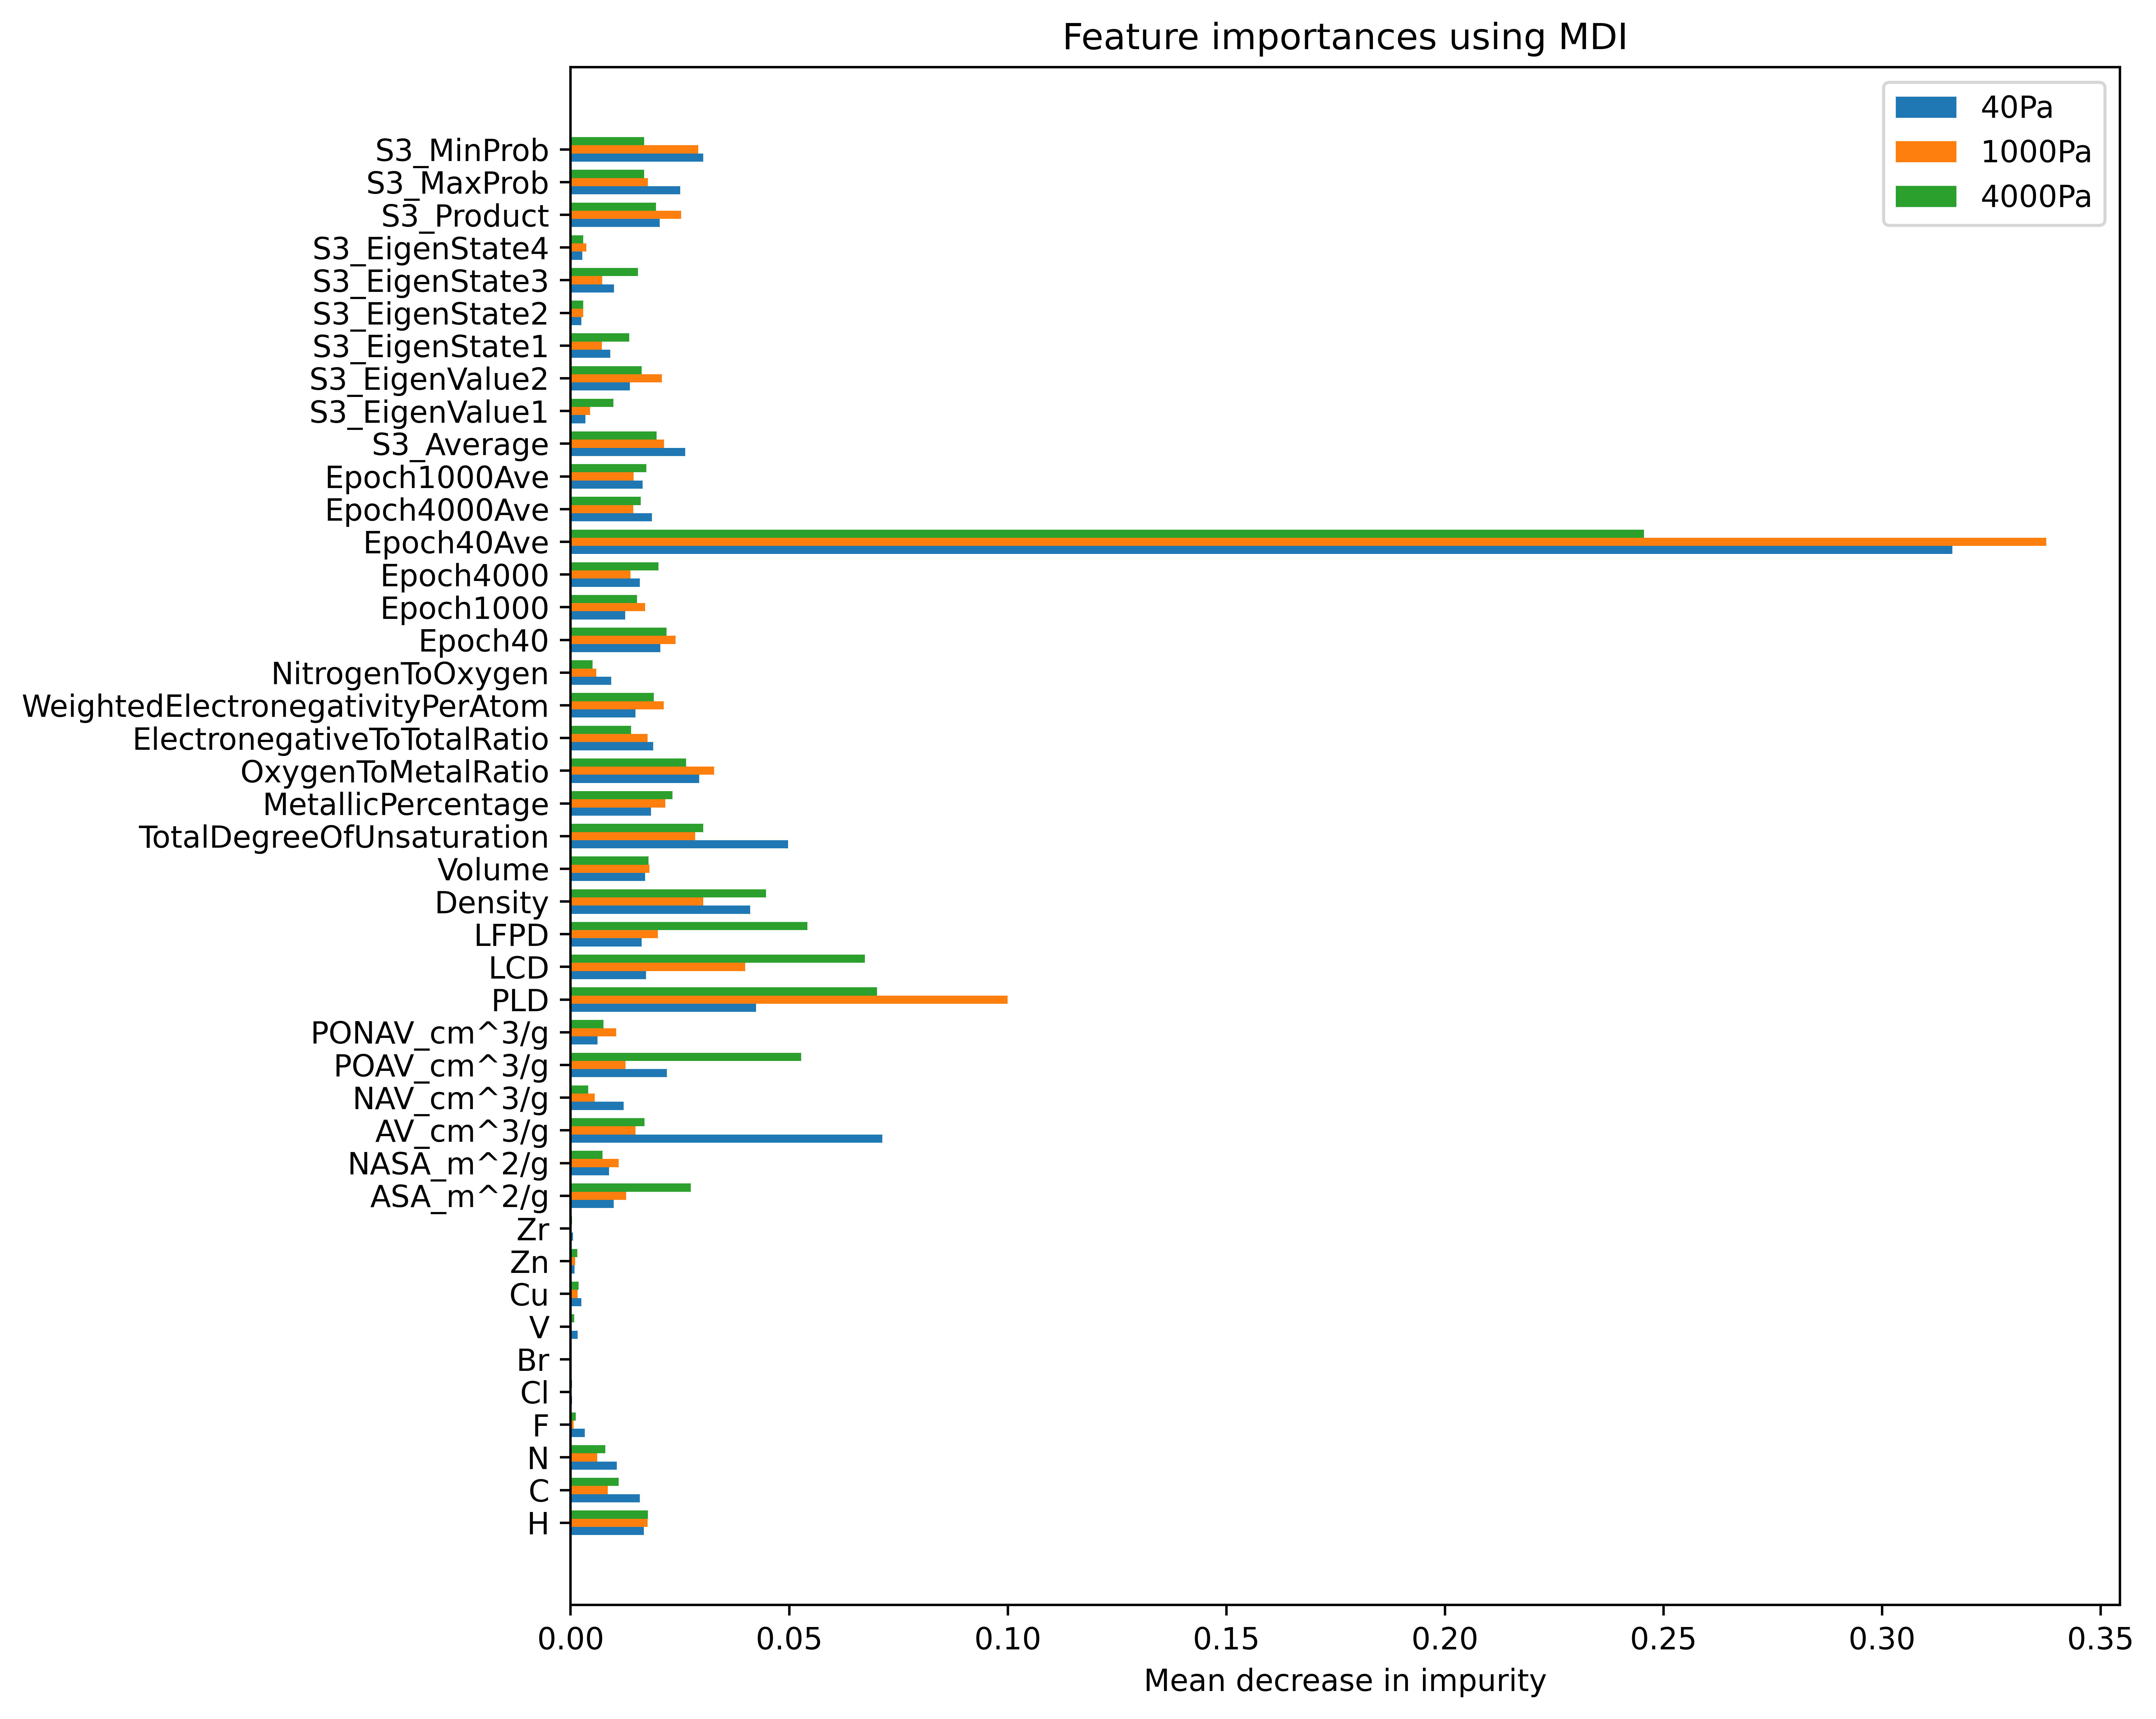

In [16]:
width = 0.25
fig, ax = plt.subplots(figsize = (10,8),dpi = 700)

X,y = X_y_from_pressure(df,40,non_energetic_descriptors)
ind = np.arange(len(X.columns))
feature_names_intermediate = list(X.columns)
feature_names = []
for i in feature_names_intermediate:
    if 'Flux' in i:
        n = "Epoch" + i[4:] 
        feature_names.append(n)
    elif "_15prb" in i:
        n = i[:-6]
        feature_names.append(n)
    else:
        feature_names.append(i)
        

ml.fit(X,y)
importances = ml.feature_importances_
ax.barh(ind-width,importances,width,label="40Pa")

X,y = X_y_from_pressure(df,1000,non_energetic_descriptors)
ml.fit(X,y)
importances = ml.feature_importances_
ax.barh(ind,importances,width,label="1000Pa")

X,y = X_y_from_pressure(df,4000,non_energetic_descriptors)
ml.fit(X,y)
importances = ml.feature_importances_
ax.barh(ind+width,importances,width,label="4000Pa")

ax.set_title("Feature importances using MDI")
plt.yticks(ind,feature_names)
ax.set_xlabel("Mean decrease in impurity")
plt.legend()
fig.tight_layout()

# Feature Importances (All Descriptors)

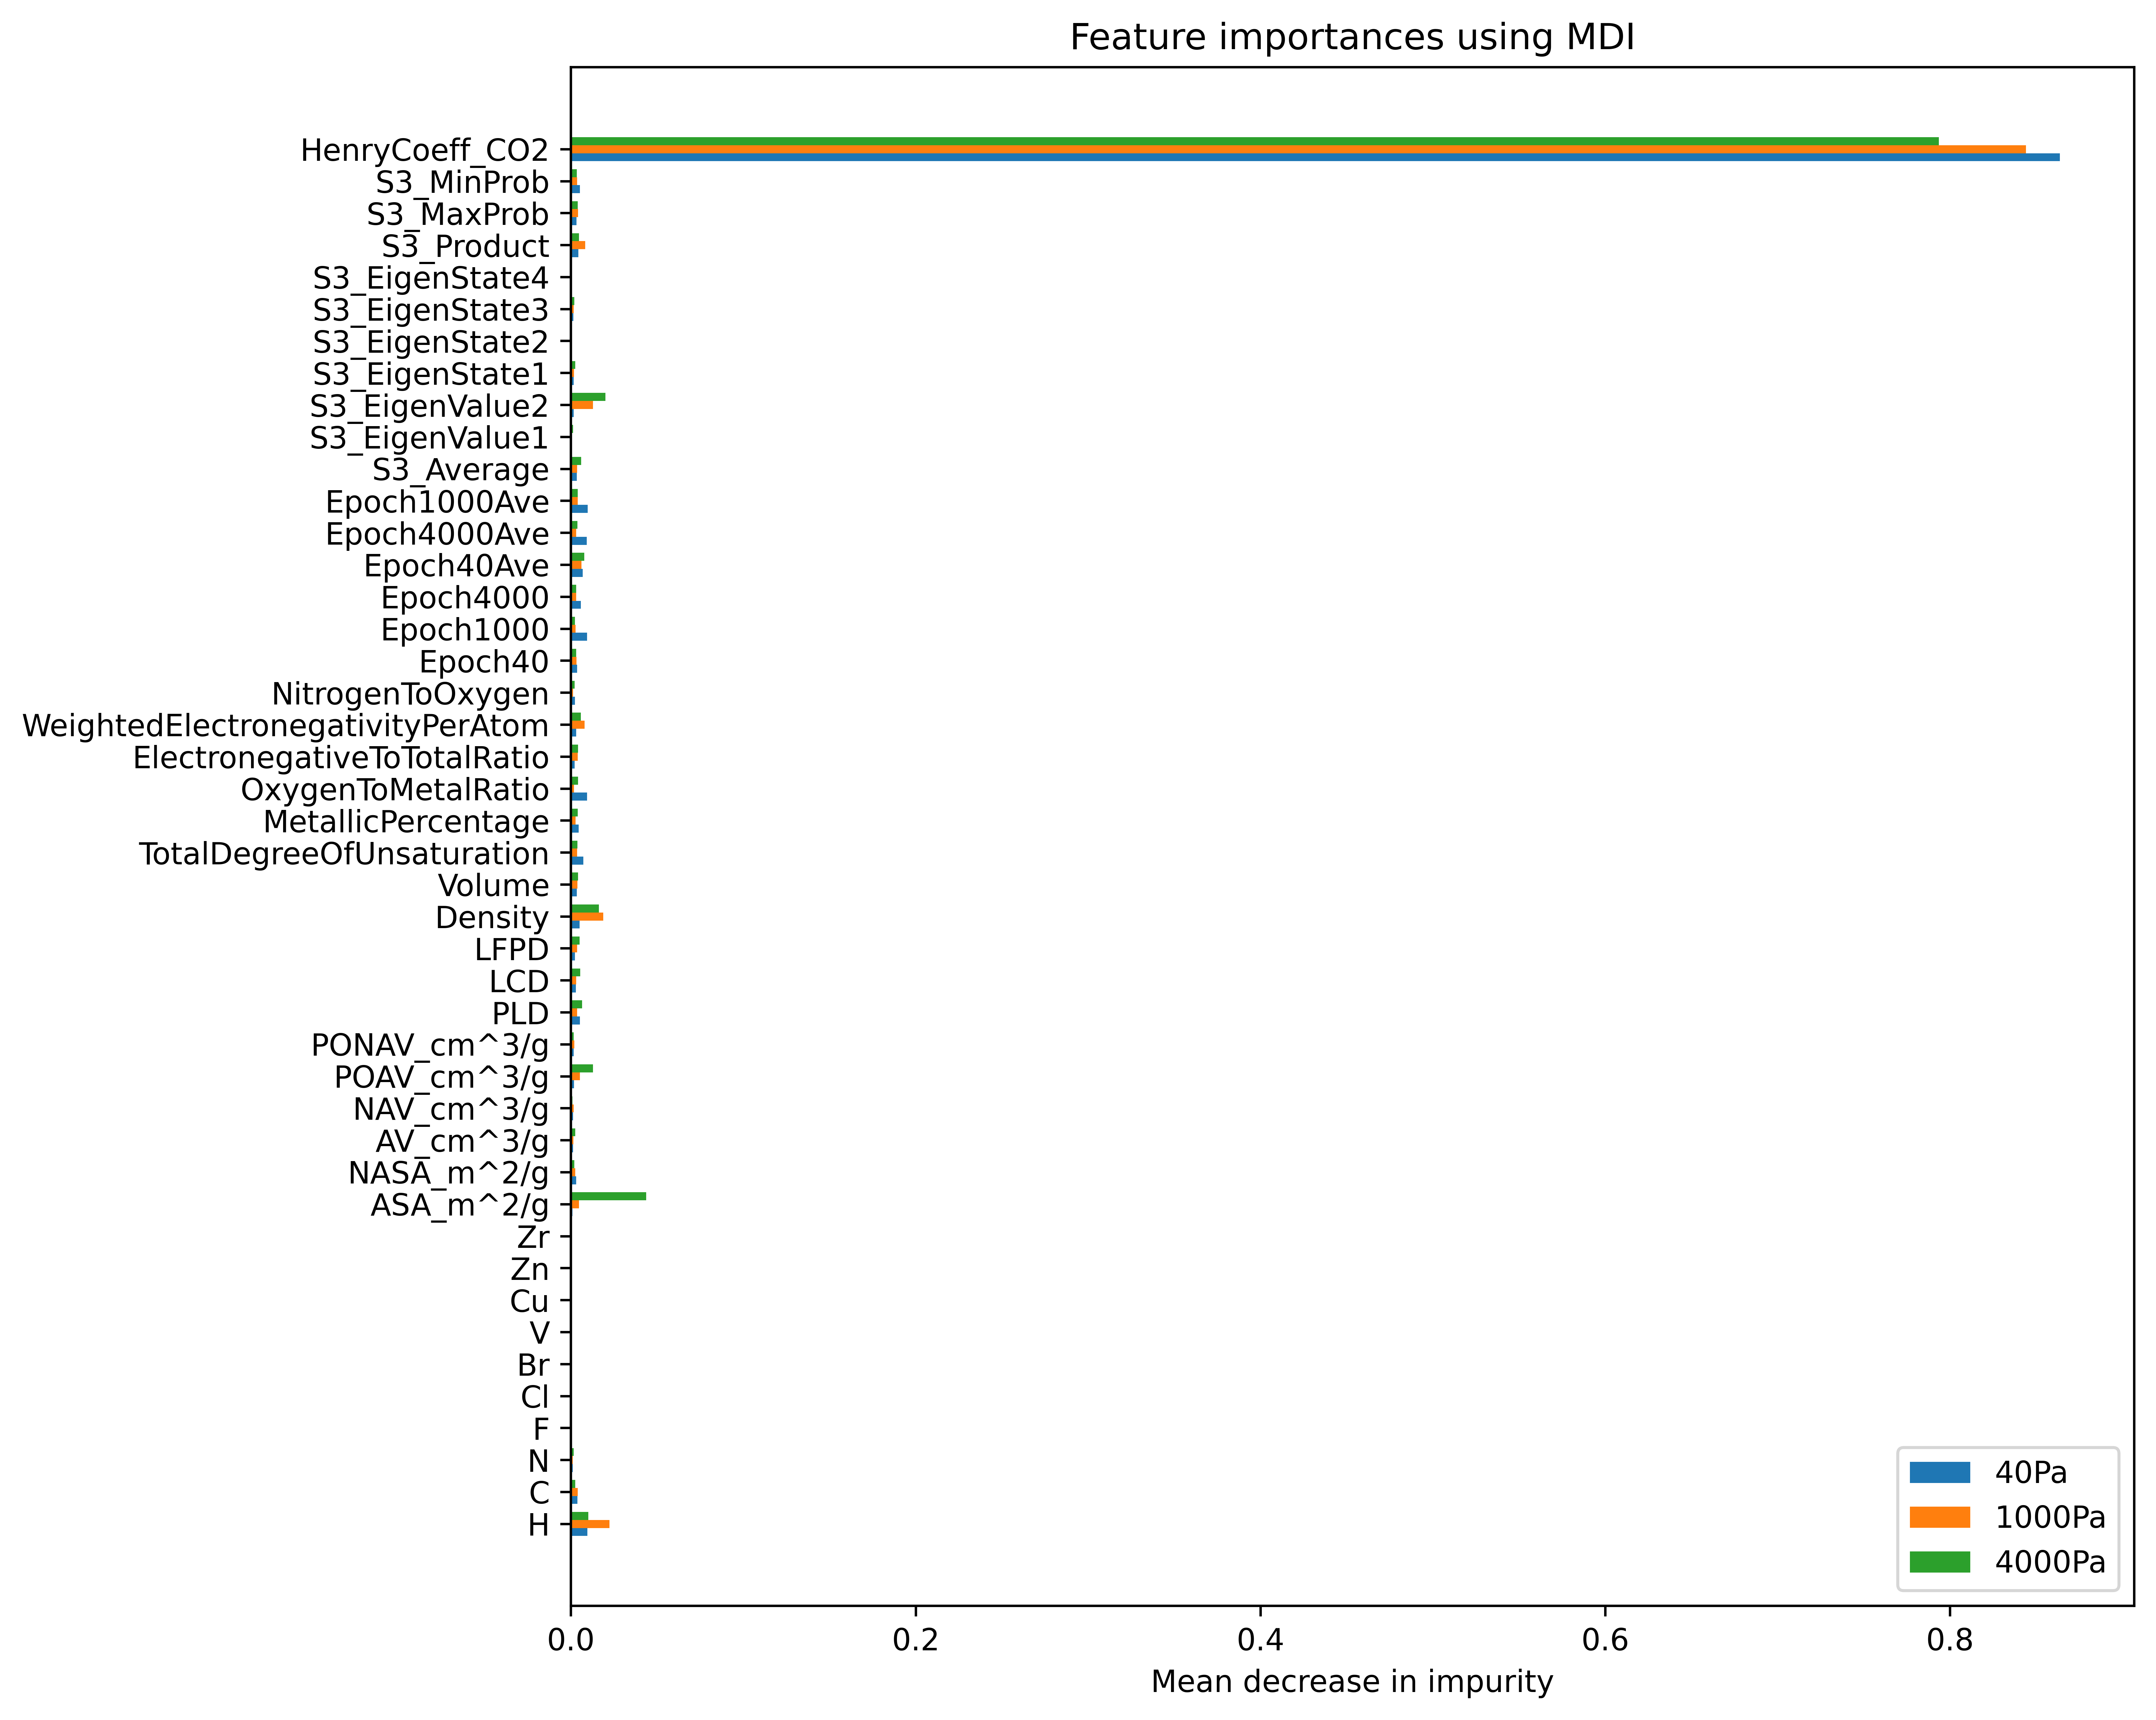

In [17]:
width = 0.25
fig, ax = plt.subplots(figsize = (10,8),dpi = 700)

X,y = X_y_from_pressure(df,40,desriptors_all)
ind = np.arange(len(X.columns))
feature_names = list(X.columns)
        
ml.fit(X,y)
importances = ml.feature_importances_
ax.barh(ind-width,importances,width,label="40Pa")

X,y = X_y_from_pressure(df,1000,desriptors_all)
ml.fit(X,y)
importances = ml.feature_importances_
ax.barh(ind,importances,width,label="1000Pa")

X,y = X_y_from_pressure(df,4000,desriptors_all)
ml.fit(X,y)
importances = ml.feature_importances_
ax.barh(ind+width,importances,width,label="4000Pa")

ax.set_title("Feature importances using MDI")
plt.yticks(ind,feature_names)
ax.set_xlabel("Mean decrease in impurity")
plt.legend()
fig.tight_layout()

# Correlation Heatmaps

In [19]:
fig, ax = plt.subplots(1,3,dpi=400,figsize = (25,15))

current = df[df.Pressure == 40]
feature_names = list(current.columns)

ax[0].set_title('Correlation With Uptake At 40Pa')
heatmap = sns.heatmap(current[desriptors_all_updated + ['Uptake']].corr()[['Uptake']].sort_values(by = 'Uptake', ascending = False),ax = ax[0])

current = df[df.Pressure == 1000]
feature_names = list(current.columns)

ax[1].set_title('Correlation With Uptake At 1000Pa')
heatmap = sns.heatmap(current[desriptors_all_updated + ['Uptake']].corr()[['Uptake']].sort_values(by = 'Uptake', ascending = False),ax = ax[1])

current = df[df.Pressure == 4000]
feature_names = list(current.columns)

ax[2].set_title('Correlation With Uptake At 4000Pa')
heatmap = sns.heatmap(current[desriptors_all_updated + ['Uptake']].corr()[['Uptake']].sort_values(by = 'Uptake', ascending = False),ax = ax[2])

plt.tight_layout()

# Comparing Feature Groups

In [20]:
combinations = {"A+B+C": baseline_descriptors,
                "D+E":groups['D'] + groups['E'],
         "A+B+C+D+E":non_energetic_descriptors,
         "F":energy_descriptors,
          "D+E+F":groups['D'] + groups['E']+ groups['F'],
          "All":desriptors_all,
         }

In [21]:
pressures = [40,1000,4000]

print("Pressure,Features,R2,MSE")
for P in pressures:
    current = df[df.Pressure == P]
    X_train_intermediate, X_test_intermediate, y_train, y_test = train_test_split(current, current['Uptake'], test_size=0.2,random_state = SEED) 

    for combination in combinations:
        feats = combinations[combination]
        X_train, X_test =X_train_intermediate[feats], X_test_intermediate[feats]
        ml.fit(X_train,y_train)
        test_pred  = ml.predict(X_test)
        test_r2    = r2_score(y_test,test_pred)
        mse        = mean_squared_error(y_test,test_pred)
        print(f"{P},{combination},{test_r2:5.4f},{mse:5.4f}")

Pressure,Features,R2,MSE
40,A+B+C,0.5122,0.1323
40,D+E,0.6230,0.1022
40,A+B+C+D+E,0.6924,0.0834
40,F,0.8052,0.0528
40,D+E+F,0.9037,0.0261
40,All,0.9194,0.0218
1000,A+B+C,0.6367,0.3637
1000,D+E,0.6316,0.3688
1000,A+B+C+D+E,0.7233,0.2770
1000,F,0.7215,0.2788
1000,D+E+F,0.9203,0.0797
1000,All,0.9343,0.0657
4000,A+B+C,0.6267,0.4989
4000,D+E,0.5698,0.5748
4000,A+B+C+D+E,0.6743,0.4352
4000,F,0.6506,0.4668
4000,D+E+F,0.9064,0.1251
4000,All,0.9335,0.0889
